In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Input, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D as Conv2D, MaxPooling2D as MaxPool2D
from tensorflow.keras.layers import BatchNormalization as BatchNorm
import tensorflow.keras.datasets.cifar10 as cifar10
import numpy as np
import matplotlib.pyplot as plt
from keras_flops import get_flops #alternative to ptflops for tensorflow/keras
#using keras sequential (or maybe functional API) to create models because I dont like pytorch

Problem 1 (30pts)

For this homework, we will use CIFAR-10, which comes with all three RGB input channels. Here is the link for loading CIFAR-10:

https://www.datascienceweekly.org/tutorials/cifar10-pytorch-load-cifar10-dataset-from-torchvisionLinks to an external site.

Train the based line VGG model we need for FashinMNIST on CIFAR-10 and report your classification accuracy for validation set, as well as training loss and training accuracy. For this training resize the network input to 64*64 resolution.
Use Table 1 in the VGG paper (Simonyan and Zisserman, 2014) to construct other common models, such as VGG-16 or VGG-19. Train them on CIFAR-10, compare the accuracies, computational complexity and model size.


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


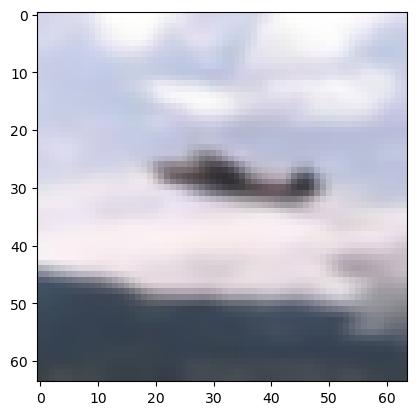

In [3]:
# Load CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

#resize images to be 64x64
train_images = tf.image.resize(train_images, (64, 64))
test_images = tf.image.resize(test_images, (64, 64))

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

#test image
plt.imshow(train_images[42069,:,:], cmap='Greys') #display random image

In [4]:
import PIL
from PIL import Image

#load custom image for testing
image = tf.keras.utils.load_img('dog64.jpg')
input_arr = tf.keras.utils.img_to_array(image)
img_arr = np.array([input_arr])  # Convert single image to a batch.

#standardize to be values from 0 to 1
img_arr = img_arr / 255.0

In [5]:
#VGG-11
# Has 5 conv blocks, first two only single conv layer
#last three blocks are FC layers
#64 and double till 512

#input (64x64x3)
inputs = Input(shape=(64,64,3))
x = layers.Conv2D(64, kernel_size=3, padding = 'same', activation='relu')(inputs)
x = layers.BatchNormalization()(x)
block1 = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Conv2D(128, kernel_size=3, padding = 'same', activation='relu')(block1)
x = layers.BatchNormalization()(x)
block2 = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Conv2D(256, kernel_size=3, padding = 'same', activation='relu')(block2)
x = layers.Conv2D(256, kernel_size=3, padding = 'same', activation='relu')(x)
x = layers.BatchNormalization()(x)
block3 = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(block3)
x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(x)
x = layers.BatchNormalization()(x)
block4 = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(block4)
x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(x)
x = layers.BatchNormalization()(x)
block5 = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Flatten()(block5)
x = layers.Dense(4096, activation='relu')(x)
#x = layers.Dropout(0.5)(x)
x = layers.Dense(4096, activation='relu')(x)
#x = layers.Dropout(0.5)(x)

outputs = layers.Dense(10)(x)
#outputs = layers.Softmax()(x)

vgg11 = tf.keras.Model(inputs, outputs)

In [6]:
#vgg16 (model D)
#add 1 conv to each vgg block

#input (64x64x3)
inputs = Input(shape=(64,64,3))
x = layers.Conv2D(64, kernel_size=3, padding = 'same', activation='relu')(inputs)
x = layers.Conv2D(64, kernel_size=3, padding = 'same', activation='relu')(x)
x = layers.BatchNormalization()(x)
block1 = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Conv2D(128, kernel_size=3, padding = 'same', activation='relu')(block1)
x = layers.Conv2D(128, kernel_size=3, padding = 'same', activation='relu')(x)
x = layers.BatchNormalization()(x)
block2 = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Conv2D(256, kernel_size=3, padding = 'same', activation='relu')(block2)
x = layers.Conv2D(256, kernel_size=3, padding = 'same', activation='relu')(x)
x = layers.Conv2D(256, kernel_size=3, padding = 'same', activation='relu')(x)
x = layers.BatchNormalization()(x)
block3 = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(block3)
x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(x)
x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(x)
x = layers.BatchNormalization()(x)
block4 = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(block4)
x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(x)
x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(x)
x = layers.BatchNormalization()(x)
block5 = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Flatten()(block5)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.1)(x)

x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(10)(x)
#outputs = layers.Softmax()(x)

vgg16 = tf.keras.Model(inputs, outputs)

In [7]:
#vgg19 (model E)
#add one more conv layer to last 3 blocks

#input (64x64x3)
inputs = Input(shape=(64,64,3))
x = layers.Conv2D(64, kernel_size=3, padding = 'same', activation='relu')(inputs)
x = layers.Conv2D(64, kernel_size=3, padding = 'same', activation='relu')(x)
x = layers.BatchNormalization()(x)
block1 = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Conv2D(128, kernel_size=3, padding = 'same', activation='relu')(block1)
x = layers.Conv2D(128, kernel_size=3, padding = 'same', activation='relu')(x)
x = layers.BatchNormalization()(x)
block2 = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Conv2D(256, kernel_size=3, padding = 'same', activation='relu')(block2)
x = layers.Conv2D(256, kernel_size=3, padding = 'same', activation='relu')(x)
x = layers.Conv2D(256, kernel_size=3, padding = 'same', activation='relu')(x)
x = layers.Conv2D(256, kernel_size=3, padding = 'same', activation='relu')(x)
x = layers.BatchNormalization()(x)
block3 = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(block3)
x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(x)
x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(x)
x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(x)
x = layers.BatchNormalization()(x)
block4 = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(block4)
x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(x)
x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(x)
x = layers.Conv2D(512, kernel_size=3, padding = 'same', activation='relu')(x)
x = layers.BatchNormalization()(x)
block5 = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Flatten()(block5)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.1)(x)

x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.1)(x)

outputs = layers.Dense(10)(x)
#outputs = layers.Softmax()(x)

vgg19 = tf.keras.Model(inputs, outputs)

In [8]:
vgg11.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# compile and train model 1.
train_hist = vgg11.fit(train_images, train_labels, 
                       validation_split=0.2,
                       epochs=30,
                       verbose = 1)

vgg11.summary()
test_loss, test_acc = vgg11.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
flops = get_flops(vgg11, batch_size=1)
print(f"FLOPS: {flops}")

Epoch 1/30
1250/1250 [==============================] - 24s 16ms/step - loss: 1.8634 - accuracy: 0.3409 - val_loss: 1.6138 - val_accuracy: 0.4087
Epoch 2/30
1250/1250 [==============================] - 20s 16ms/step - loss: 1.3468 - accuracy: 0.5122 - val_loss: 1.3135 - val_accuracy: 0.5367
Epoch 3/30
1250/1250 [==============================] - 20s 16ms/step - loss: 1.0177 - accuracy: 0.6410 - val_loss: 1.2207 - val_accuracy: 0.5963
Epoch 4/30
1250/1250 [==============================] - 20s 16ms/step - loss: 0.7778 - accuracy: 0.7304 - val_loss: 0.7827 - val_accuracy: 0.7323
Epoch 5/30
1250/1250 [==============================] - 20s 16ms/step - loss: 0.6078 - accuracy: 0.7924 - val_loss: 0.7164 - val_accuracy: 0.7543
Epoch 6/30
1250/1250 [==============================] - 20s 16ms/step - loss: 0.4758 - accuracy: 0.8335 - val_loss: 0.8160 - val_accuracy: 0.7434
Epoch 7/30
1250/1250 [==============================] - 20s 16ms/step - loss: 0.3668 - accuracy: 0.8720 - val_loss: 0.9494 -

FLOPS: 1274651274


In [9]:
vgg16.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# compile and train model 1.
train_hist = vgg16.fit(train_images, train_labels, 
                       validation_split=0.2,
                       epochs=30,
                       verbose = 1)

vgg16.summary()
test_loss, test_acc = vgg16.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
flops = get_flops(vgg16, batch_size=1)
print(f"FLOPS: {flops}")

Epoch 1/30
1250/1250 [==============================] - 36s 27ms/step - loss: 2.2758 - accuracy: 0.1896 - val_loss: 2.3328 - val_accuracy: 0.1477
Epoch 2/30
1250/1250 [==============================] - 34s 27ms/step - loss: 1.7096 - accuracy: 0.3620 - val_loss: 1.9537 - val_accuracy: 0.2854
Epoch 3/30
1250/1250 [==============================] - 34s 27ms/step - loss: 1.4073 - accuracy: 0.4874 - val_loss: 1.3359 - val_accuracy: 0.5191
Epoch 4/30
1250/1250 [==============================] - 34s 27ms/step - loss: 1.1269 - accuracy: 0.6051 - val_loss: 3.1454 - val_accuracy: 0.3201
Epoch 5/30
1250/1250 [==============================] - 34s 27ms/step - loss: 0.9181 - accuracy: 0.6864 - val_loss: 1.0668 - val_accuracy: 0.6443
Epoch 6/30
1250/1250 [==============================] - 34s 27ms/step - loss: 0.7670 - accuracy: 0.7402 - val_loss: 0.9493 - val_accuracy: 0.6799
Epoch 7/30
1250/1250 [==============================] - 34s 27ms/step - loss: 0.6469 - accuracy: 0.7812 - val_loss: 0.7333 -

313/313 - 2s - loss: 0.9665 - accuracy: 0.8374

Test accuracy: 0.8374000191688538
FLOPS: 2558608010


In [10]:
vgg19.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# compile and train model 1.
train_hist = vgg19.fit(train_images, train_labels, 
                       validation_split=0.2,
                       epochs=30,
                       verbose = 1)

vgg19.summary()
test_loss, test_acc = vgg19.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
flops = get_flops(vgg19, batch_size=1)
print(f"FLOPS: {flops}")

Epoch 1/30
1250/1250 [==============================] - 41s 32ms/step - loss: 2.4267 - accuracy: 0.1649 - val_loss: 2.1923 - val_accuracy: 0.1677
Epoch 2/30
1250/1250 [==============================] - 39s 32ms/step - loss: 2.1106 - accuracy: 0.2021 - val_loss: 2.0416 - val_accuracy: 0.2265
Epoch 3/30
1250/1250 [==============================] - 41s 32ms/step - loss: 2.0165 - accuracy: 0.2202 - val_loss: 2.2135 - val_accuracy: 0.2088
Epoch 4/30
1250/1250 [==============================] - 40s 32ms/step - loss: 1.9309 - accuracy: 0.2496 - val_loss: 1.9845 - val_accuracy: 0.2303
Epoch 5/30
1250/1250 [==============================] - 40s 32ms/step - loss: 1.8551 - accuracy: 0.2767 - val_loss: 1.7807 - val_accuracy: 0.2922
Epoch 6/30
1250/1250 [==============================] - 40s 32ms/step - loss: 1.7875 - accuracy: 0.2935 - val_loss: 1.7849 - val_accuracy: 0.3103
Epoch 7/30
1250/1250 [==============================] - 40s 32ms/step - loss: 1.7271 - accuracy: 0.3193 - val_loss: 1.6821 -

313/313 - 3s - loss: 0.7737 - accuracy: 0.7969

Test accuracy: 0.7968999743461609
FLOPS: 3238191754


Problem 2 (30pts)

Use the CIFAR-10 to train a baseline classifier based on the GoogleNet model we did in lectures for 64*64 input resolution. Report your classification accuracy for the validation set, as well as training loss and training accuracy.
Add batch normalization layer to GoogleNet (think about what is the best way of adding it). Train it again. Report your classification accuracy for the validation set, as well as training loss and training accuracy. Compare your accuracy against Problem2.1.
 

In [11]:

def inception(inputs, filters):
    b1 = layers.Conv2D(filters[0], kernel_size=1,activation='relu')(inputs)
    
    b2 = layers.Conv2D(filters[1], kernel_size=1,activation='relu')(inputs)
    b2 = layers.Conv2D(filters[2], kernel_size=3,padding='same',activation='relu')(b2)
    
    b3 = layers.Conv2D(filters[3], kernel_size=1,activation='relu')(inputs)
    b3 = layers.Conv2D(filters[4], kernel_size=5, padding='same', activation='relu')(b3)
    
    b4 = layers.MaxPool2D(pool_size=3,strides=1,padding='same')(inputs)
    b4 = layers.Conv2D(filters[5], kernel_size=1,activation='relu')(b4)
    
    outputs = layers.Concatenate(axis=3)([b1,b2,b3,b4])
    
    return outputs 
    

In [12]:
inputs = Input(shape=(64,64,3))

x = layers.Conv2D(64, kernel_size=7, strides=2, padding = 'same', activation='relu')(inputs)
x = layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)

x = layers.Conv2D(64, kernel_size=1, activation='relu')(x)
x = layers.Conv2D(192, kernel_size=3, padding='same',activation='relu')(x)
x = layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)

x = inception(x, [64,96,128,16,32,32])
x = inception(x, [128,128,192,32,96,64])
x = layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)

x = inception(x, [192,96,208,16,48,64])
x = inception(x, [160,112,224,24,64,64])
x = inception(x, [128,128,256,24,64,64])
x = inception(x, [112,144,288,32,64,64])
x = inception(x, [256,160,320,32,128,128])
x = layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)

x = inception(x, [256,160,320,32,128,128])
x = inception(x, [384,192,384,48,128,128])
x = layers.AveragePooling2D(pool_size=1)(x)
x = layers.Flatten()(x)

outputs = layers.Dense(10)(x)

GoogleNet = tf.keras.Model(inputs, outputs)


In [13]:
GoogleNet.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# compile and train model 1.
train_hist = GoogleNet.fit(train_images, train_labels, 
                       validation_split=0.2,
                       epochs=30,
                       verbose = 1)

GoogleNet.summary()
test_loss, test_acc = GoogleNet.evaluate(test_images,  test_labels, verbose=0)
print('\nTest accuracy:', test_acc)
flops = get_flops(GoogleNet, batch_size=1)
print(f"FLOPS: {flops}")

Epoch 1/30
1250/1250 [==============================] - 24s 17ms/step - loss: 2.1921 - accuracy: 0.1690 - val_loss: 2.0431 - val_accuracy: 0.2463
Epoch 2/30
1250/1250 [==============================] - 20s 16ms/step - loss: 1.8013 - accuracy: 0.3261 - val_loss: 1.5686 - val_accuracy: 0.4156
Epoch 3/30
1250/1250 [==============================] - 19s 15ms/step - loss: 1.5237 - accuracy: 0.4370 - val_loss: 1.3693 - val_accuracy: 0.4960
Epoch 4/30
1250/1250 [==============================] - 19s 15ms/step - loss: 1.3458 - accuracy: 0.5116 - val_loss: 1.3226 - val_accuracy: 0.5315
Epoch 5/30
1250/1250 [==============================] - 19s 15ms/step - loss: 1.1981 - accuracy: 0.5696 - val_loss: 1.1979 - val_accuracy: 0.5773
Epoch 6/30
1250/1250 [==============================] - 20s 16ms/step - loss: 1.0711 - accuracy: 0.6185 - val_loss: 1.2279 - val_accuracy: 0.5719
Epoch 7/30
1250/1250 [==============================] - 19s 15ms/step - loss: 0.9647 - accuracy: 0.6576 - val_loss: 0.9949 -


Test accuracy: 0.7275999784469604
FLOPS: 259619018


In [14]:
inputs = Input(shape=(64,64,3))

x = layers.Conv2D(64, kernel_size=7, strides=2, padding = 'same', activation='relu')(inputs)
x = layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)

x = layers.Conv2D(64, kernel_size=1, activation='relu')(x)
x = layers.Conv2D(192, kernel_size=3, padding='same',activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)



x = inception(x, [64,96,128,16,32,32])
x = inception(x, [128,128,192,32,96,64])
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)


x = inception(x, [192,96,208,16,48,64])
x = inception(x, [160,112,224,24,64,64])
x = inception(x, [128,128,256,24,64,64])
x = inception(x, [112,144,288,32,64,64])
x = inception(x, [256,160,320,32,128,128])
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)


x = inception(x, [256,160,320,32,128,128])
x = inception(x, [384,192,384,48,128,128])
x = layers.BatchNormalization()(x)
x = layers.AveragePooling2D(pool_size=1)(x)
x = layers.Flatten()(x)

outputs = layers.Dense(10)(x)

GoogleNetBN = tf.keras.Model(inputs, outputs)

In [15]:
GoogleNetBN.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# compile and train model 1.
train_hist = GoogleNetBN.fit(train_images, train_labels, 
                       validation_split=0.2,
                       epochs=30,
                       verbose = 1)

test_loss, test_acc = GoogleNetBN.evaluate(test_images,  test_labels, verbose=2)


Epoch 1/30
1250/1250 [==============================] - 23s 17ms/step - loss: 3.9715 - accuracy: 0.1222 - val_loss: 2.4463 - val_accuracy: 0.1229
Epoch 2/30
1250/1250 [==============================] - 20s 16ms/step - loss: 2.1334 - accuracy: 0.1913 - val_loss: 2.3849 - val_accuracy: 0.1715
Epoch 3/30
1250/1250 [==============================] - 20s 16ms/step - loss: 1.8850 - accuracy: 0.2828 - val_loss: 3.7559 - val_accuracy: 0.0966
Epoch 4/30
1250/1250 [==============================] - 20s 16ms/step - loss: 1.7489 - accuracy: 0.3385 - val_loss: 2.0471 - val_accuracy: 0.2599
Epoch 5/30
1250/1250 [==============================] - 20s 16ms/step - loss: 1.6134 - accuracy: 0.3939 - val_loss: 5.4491 - val_accuracy: 0.1371
Epoch 6/30
1250/1250 [==============================] - 20s 16ms/step - loss: 1.5252 - accuracy: 0.4325 - val_loss: 1.7763 - val_accuracy: 0.3381
Epoch 7/30
1250/1250 [==============================] - 20s 16ms/step - loss: 1.4275 - accuracy: 0.4745 - val_loss: 1.9115 -

Problem 3 (40pts)

The baseline model we did in homework is called ResNet-18. Train that for CIFAR-10 and report and compare your validation accuracy against GoogleNet and VGGNet architectures you did. Can you compare the training time, model size and computation complexity across these three networks for CIFAR-10? Use 64*64 resolution across all training.
Build two new versions of ResNet (ResNet-26, and ResNet-32). Train them on CIFAR-10. Plot the training loss, training accuracy and validation accuracy. Compare the classification accuracy, computation complexity, and model size across these three versions of ResNet (18, 26, 32). How does the complexity grow as you increase the network depth?

In [16]:
def res_block(inputs, filters, use_conv=False, stridenum=1):
    y = inputs
    x = layers.Conv2D(filters, kernel_size=3,strides=stridenum,padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(filters, kernel_size=3,padding='same')(x)
    x = layers.BatchNormalization()(x)
    if use_conv:
        y = layers.Conv2D(filters, kernel_size=1,strides=stridenum)(y)
    outputs = layers.Add()([x, y])
    outputs = layers.Activation('relu')(outputs)
    return outputs

def res_module(inputs, filters):
    x = res_block(inputs, filters, True, 2)
    outputs = res_block(x, filters)
    return outputs

In [17]:
inputs = Input(shape=(64,64,3))

x = layers.Conv2D(64, kernel_size=7, strides=2, padding = 'same', activation='relu')(inputs)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)

x = res_block(x, 64)
x = res_block(x, 64)
x = res_module(x, 128)
x = res_module(x, 256)
x = res_module(x, 512)

x = layers.AveragePooling2D(pool_size=1)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10)(x)

ResNet18 = tf.keras.Model(inputs, outputs)

Epoch 1/30
1250/1250 [==============================] - 17s 12ms/step - loss: 1.7738 - accuracy: 0.3875 - val_loss: 1.5577 - val_accuracy: 0.4544
Epoch 2/30
1250/1250 [==============================] - 15s 12ms/step - loss: 1.2601 - accuracy: 0.5498 - val_loss: 2.0244 - val_accuracy: 0.3954
Epoch 3/30
1250/1250 [==============================] - 14s 11ms/step - loss: 1.0354 - accuracy: 0.6312 - val_loss: 1.0799 - val_accuracy: 0.6225
Epoch 4/30
1250/1250 [==============================] - 14s 11ms/step - loss: 0.8725 - accuracy: 0.6930 - val_loss: 1.1730 - val_accuracy: 0.6311
Epoch 5/30
1250/1250 [==============================] - 14s 11ms/step - loss: 0.7329 - accuracy: 0.7411 - val_loss: 0.9807 - val_accuracy: 0.6682
Epoch 6/30
1250/1250 [==============================] - 14s 11ms/step - loss: 0.6014 - accuracy: 0.7884 - val_loss: 1.2804 - val_accuracy: 0.6218
Epoch 7/30
1250/1250 [==============================] - 14s 11ms/step - loss: 0.4924 - accuracy: 0.8262 - val_loss: 1.1085 -

313/313 - 1s - loss: 1.9723 - accuracy: 0.7086

Test accuracy: 0.7085999846458435
FLOPS: 296946570


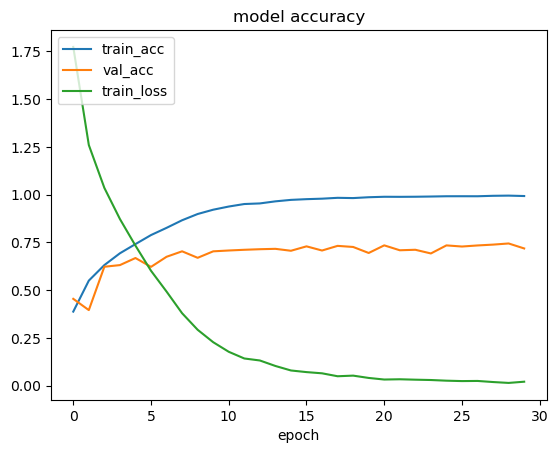

In [18]:
ResNet18.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# compile and train model 1.
train_hist = ResNet18.fit(train_images, train_labels, 
                       validation_split=0.2,
                       epochs=30,
                       verbose = 1)

ResNet18.summary()
test_loss, test_acc = ResNet18.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
flops = get_flops(ResNet18, batch_size=1)
print(f"FLOPS: {flops}")

plt.plot(train_hist.history['accuracy'])
plt.plot(train_hist.history['val_accuracy'])
plt.plot(train_hist.history['loss'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc='upper left')
plt.show()

In [19]:
inputs = Input(shape=(64,64,3))

x = layers.Conv2D(64, kernel_size=7, strides=2, padding = 'same', activation='relu')(inputs)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)

x = res_block(x, 64) 
x = res_block(x, 64)

x = res_module(x, 128)
x = res_block(x, 128)
x = res_block(x, 128)

x = res_module(x, 256)
x = res_block(x, 256)
x = res_block(x, 256)

x = res_module(x, 512)

x = layers.AveragePooling2D(pool_size=1)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10)(x)

ResNet26 = tf.keras.Model(inputs, outputs)

In [20]:
inputs = Input(shape=(64,64,3))

x = layers.Conv2D(64, kernel_size=7, strides=2, padding = 'same', activation='relu')(inputs)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)

x = res_block(x, 64) 
x = res_block(x, 64)

x = res_module(x, 128)
x = res_block(x, 128)
x = res_block(x, 128)

x = res_module(x, 256)
x = res_block(x, 256)
x = res_block(x, 256)

x = res_module(x, 512)

x = layers.AveragePooling2D(pool_size=1)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10)(x)

ResNet26 = tf.keras.Model(inputs, outputs)

Epoch 1/30
1250/1250 [==============================] - 20s 15ms/step - loss: 2.0412 - accuracy: 0.3325 - val_loss: 1.7526 - val_accuracy: 0.3778
Epoch 2/30
1250/1250 [==============================] - 18s 14ms/step - loss: 1.3949 - accuracy: 0.4952 - val_loss: 2.2502 - val_accuracy: 0.4631
Epoch 3/30
1250/1250 [==============================] - 18s 15ms/step - loss: 1.2032 - accuracy: 0.5701 - val_loss: 1.7598 - val_accuracy: 0.5330
Epoch 4/30
1250/1250 [==============================] - 18s 14ms/step - loss: 1.0610 - accuracy: 0.6209 - val_loss: 1.1117 - val_accuracy: 0.6198
Epoch 5/30
1250/1250 [==============================] - 18s 15ms/step - loss: 0.9559 - accuracy: 0.6621 - val_loss: 1.3487 - val_accuracy: 0.5423
Epoch 6/30
1250/1250 [==============================] - 18s 15ms/step - loss: 0.8484 - accuracy: 0.7016 - val_loss: 1.4123 - val_accuracy: 0.5885
Epoch 7/30
1250/1250 [==============================] - 18s 15ms/step - loss: 0.7468 - accuracy: 0.7369 - val_loss: 1.0409 -

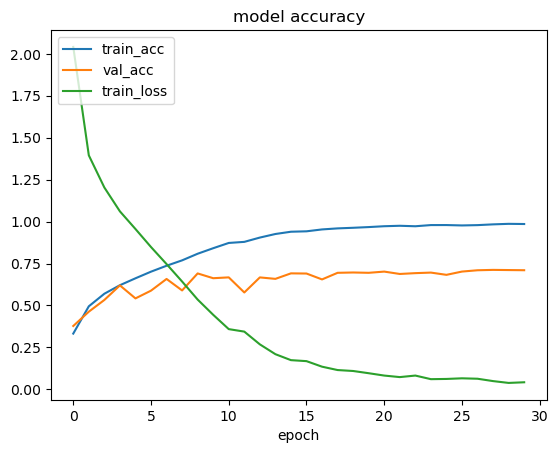

In [21]:
ResNet26.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# compile and train model 1.
train_hist = ResNet26.fit(train_images, train_labels, 
                       validation_split=0.2,
                       epochs=30,
                       verbose = 1)

test_loss, test_acc = ResNet26.evaluate(test_images,  test_labels, verbose=2)

plt.plot(train_hist.history['accuracy'])
plt.plot(train_hist.history['val_accuracy'])
plt.plot(train_hist.history['loss'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc='upper left')
plt.show()

3

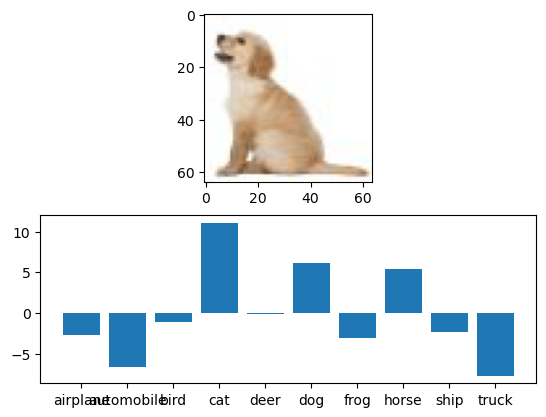

In [22]:
predictions = ResNet26.predict(img_arr) #predict for model1

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.subplot(2,1,1)
plt.imshow(img_arr[0,:,:], cmap='Greys')
plt.subplot(2,1,2)
plt.bar(class_names, predictions[0]) #display confidence values as bar plot
np.argmax(predictions)

In [26]:
inputs = Input(shape=(64,64,3))

x = layers.Conv2D(64, kernel_size=7, strides=2, padding = 'same', activation='relu')(inputs)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)

x = res_block(x, 64) 
x = res_block(x, 64)
x = res_block(x, 64)

x = res_module(x, 128)
x = res_block(x, 128)
x = res_block(x, 128)

x = res_module(x, 256)
x = res_block(x, 256)
x = res_block(x, 256)
x = res_block(x, 256)
x = res_block(x, 256)

x = res_module(x, 512)
x = res_block(x, 512)

x = layers.AveragePooling2D(pool_size=1)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10)(x)

ResNet34 = tf.keras.Model(inputs, outputs)

In [27]:
ResNet34.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# compile and train model 1.
train_hist = ResNet34.fit(train_images, train_labels, 
                       validation_split=0.2,
                       epochs=30,
                       verbose = 1)

test_loss, test_acc = ResNet34.evaluate(test_images,  test_labels, verbose=2)


Epoch 1/30
1250/1250 [==============================] - 46s 35ms/step - loss: 2.3309 - accuracy: 0.2519 - val_loss: 1.8046 - val_accuracy: 0.3794
Epoch 2/30
1250/1250 [==============================] - 42s 34ms/step - loss: 1.5473 - accuracy: 0.4376 - val_loss: 1.4289 - val_accuracy: 0.4914
Epoch 3/30
1250/1250 [==============================] - 43s 34ms/step - loss: 1.3457 - accuracy: 0.5158 - val_loss: 1.3766 - val_accuracy: 0.5252
Epoch 4/30
1250/1250 [==============================] - 44s 35ms/step - loss: 1.1923 - accuracy: 0.5713 - val_loss: 1.2971 - val_accuracy: 0.5708
Epoch 5/30
1250/1250 [==============================] - 45s 36ms/step - loss: 1.0636 - accuracy: 0.6220 - val_loss: 1.6634 - val_accuracy: 0.5441
Epoch 6/30
1250/1250 [==============================] - 34s 28ms/step - loss: 0.9515 - accuracy: 0.6628 - val_loss: 1.0827 - val_accuracy: 0.6383
Epoch 7/30
1250/1250 [==============================] - 24s 19ms/step - loss: 0.8371 - accuracy: 0.7031 - val_loss: 1.1026 -

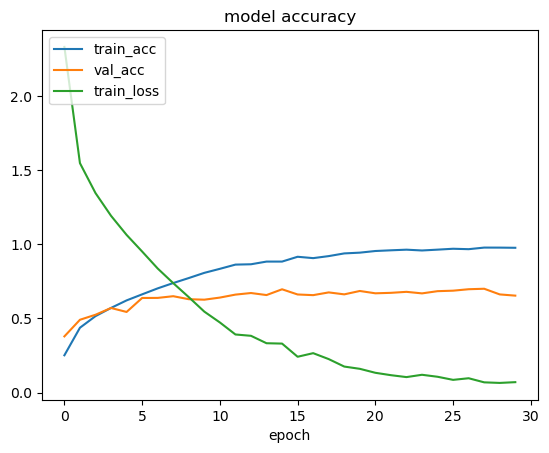

In [28]:
plt.plot(train_hist.history['accuracy'])
plt.plot(train_hist.history['val_accuracy'])
plt.plot(train_hist.history['loss'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc='upper left')
plt.show()
